In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    accuracy_score,
    f1_score)

In questa esercitazione utilizzeremo il dataset [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) messo a disposizione da Scikit Learn.

In particolare, il dataset viene usato principalmente a scopo di classificazione, e contiene $150$ campioni relativi a tre diverse specie di fiori, specificamente, *Setosa*, *Versicolour* e *Virginica*. Per ciascuno dei campioni, sono riportate quattro feature, ovvero ampiezza e lunghezza sia di sepalo (ovvero ciò che separa lo stelo dal fiore), sia di petalo. Anche in questo caso, proviamo innanzitutto a visualizzare il dataset, importandolo come dataframe.

In [2]:
data = load_iris(as_frame=True)
df = data.data

Proviamo a visualizzare come si distribuiscono lunghezza ed ampiezza di sepalo e petalo. In particolare, coloriamo ogni campione in base al valore contenuto nel `target` del dataset originario.

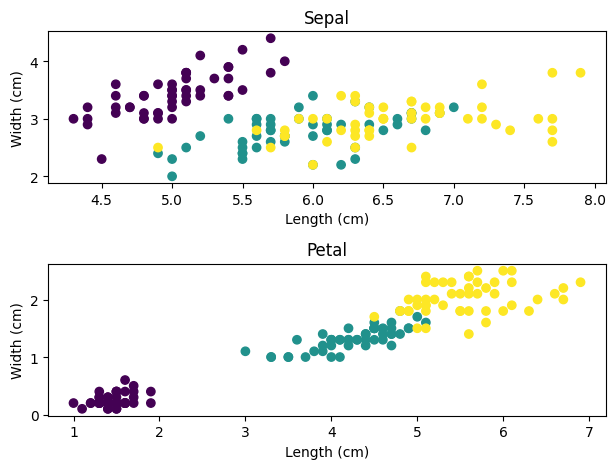

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, tight_layout=True)
ax1.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=data.target)
ax1.set_xlabel('Length (cm)')
ax1.set_ylabel('Width (cm)')
ax1.set_title('Sepal')
ax2.scatter(df['petal length (cm)'], df['petal width (cm)'], c=data.target)
ax2.set_xlabel('Length (cm)')
ax2.set_ylabel('Width (cm)')
ax2.set_title('Petal')
plt.show()

Dalle figure precedenti, si può desumere una certa separazione per quello che riguarda il petalo, con parziali sovrapposizioni sul sepalo. Possiamo quindi provare ad addestrare un classificatore basandoci su queste quattro feature.

Per prima cosa, carichiamo i dati nel formato $(X, y)$, e suddividiamoli in set di training e testing mediante la funzione `train_test_split`.

In [4]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In questo esempio, useremo un regressore logistico. Il classificatore sarà addestrato sui dati di training, mentre le metriche saranno calcolate sulle performance ottenute sui dati di testing.

In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Calcoliamo le metriche.

In [6]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall = round(recall_score(y_test, y_pred, average='weighted'), 2)
f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)
print(f'Accuracy: {accuracy}')
print(f'Precisione: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.92
Precisione: 0.94
Recall: 0.92
F1: 0.92


Proviamo adesso a visualizzare la matrice di confusione creando un oggetto di classe `ConfusionMatrixDisplay` a partire dalle predizioni ottenute.

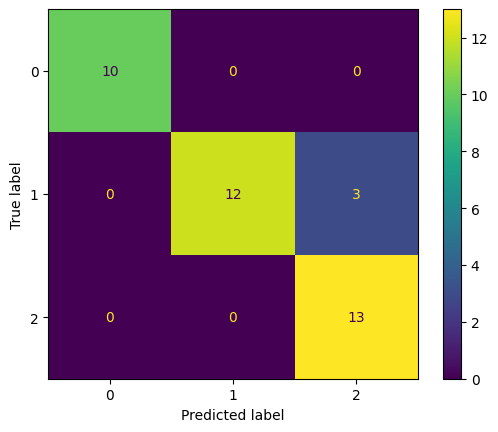

In [7]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()